### Lab 7:  Convolutional Neural Networks

(c) Peter Samoaa

### CASE STUDY: FASHION CLASS CLASSIFICATION 


The global fashion industry is valued at three trillion dollars and accounts for two percent of the world's GDP.
The fashion industry is undergoing a dramatic transformation by adopting new computer vision and machine learning and deep learning techniques. In this case study, we will look at a hypothetical situation, will assume that a fashion retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing, either bags, dresses and pants. 
The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns. in this study, we're going to use the fashion MNIST data. It's a dataset that contains images of bags, shoes and dresses and we're asking the deep network to classify the images into ten classes. 


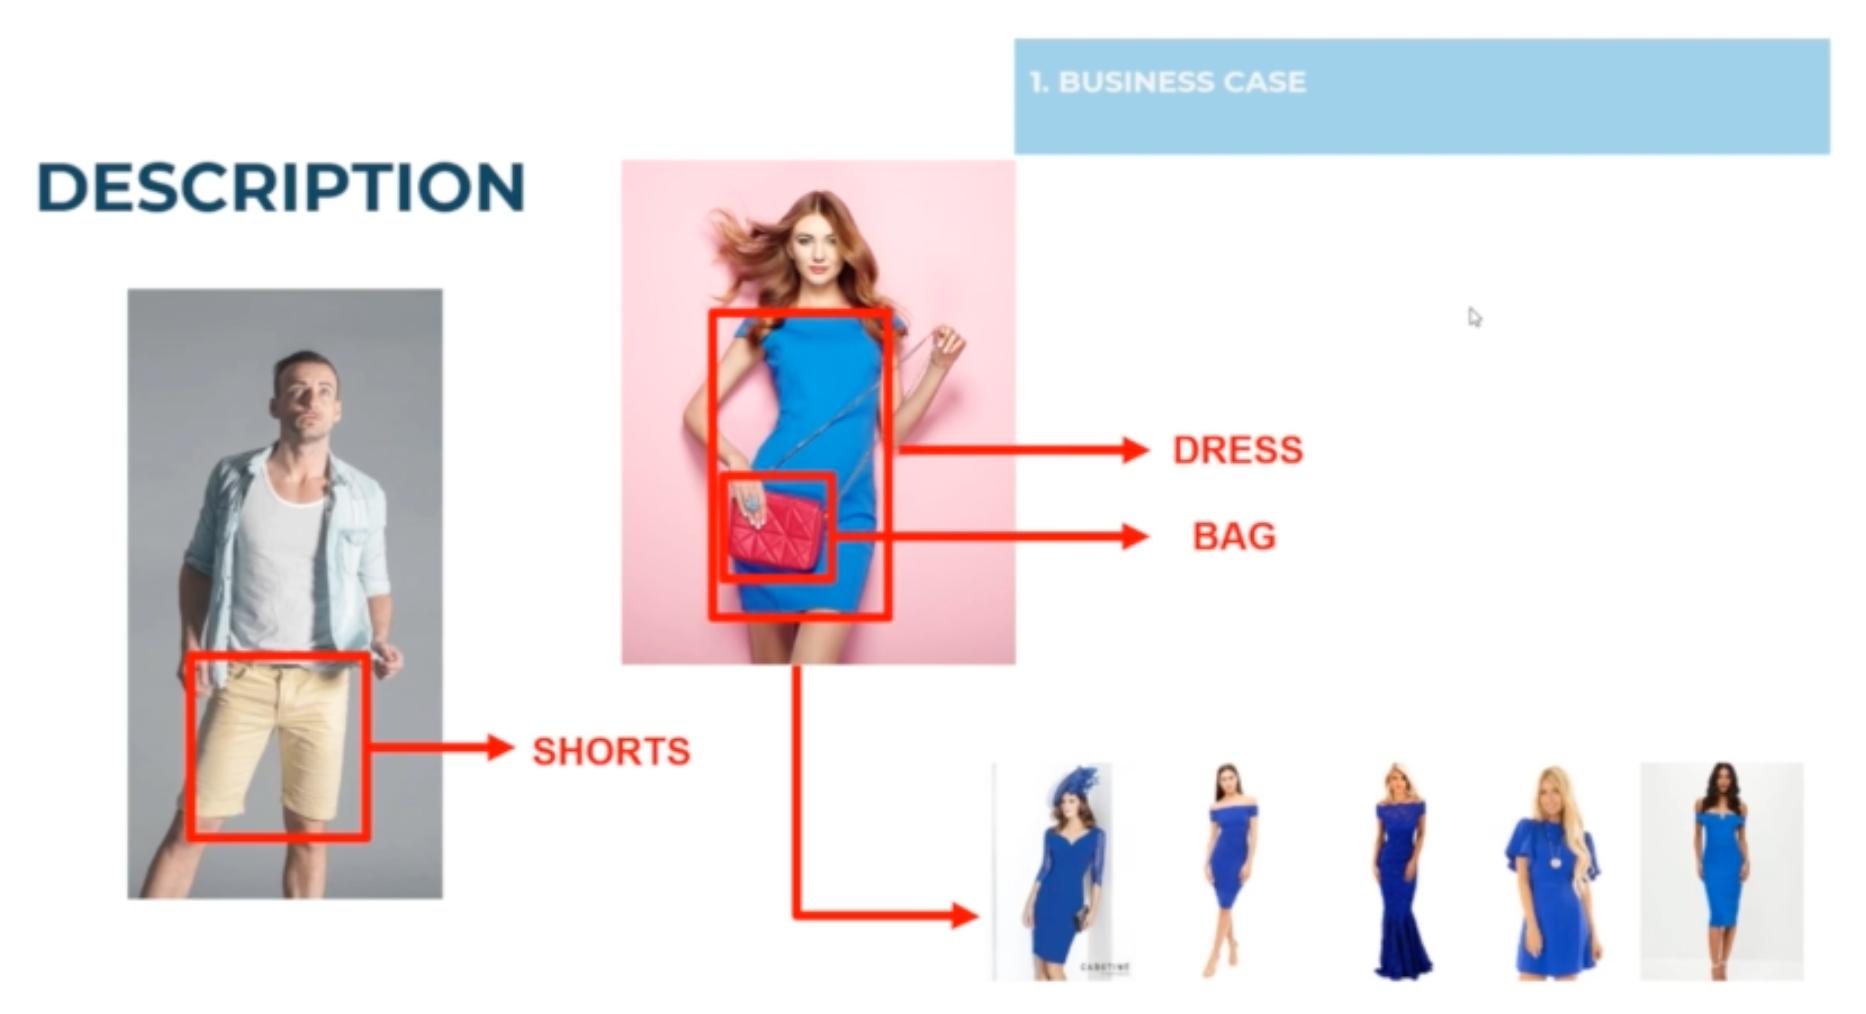

Eventually we wanted to build kind of an app or a model that can look at images and can tell us exactly what category in this image. Is it like a short is it a bag? Is it like a hat and so on. 
So we wanted to build kind of artificial intelligence based deep learning model that can classify images into different categories or different classes. 

# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

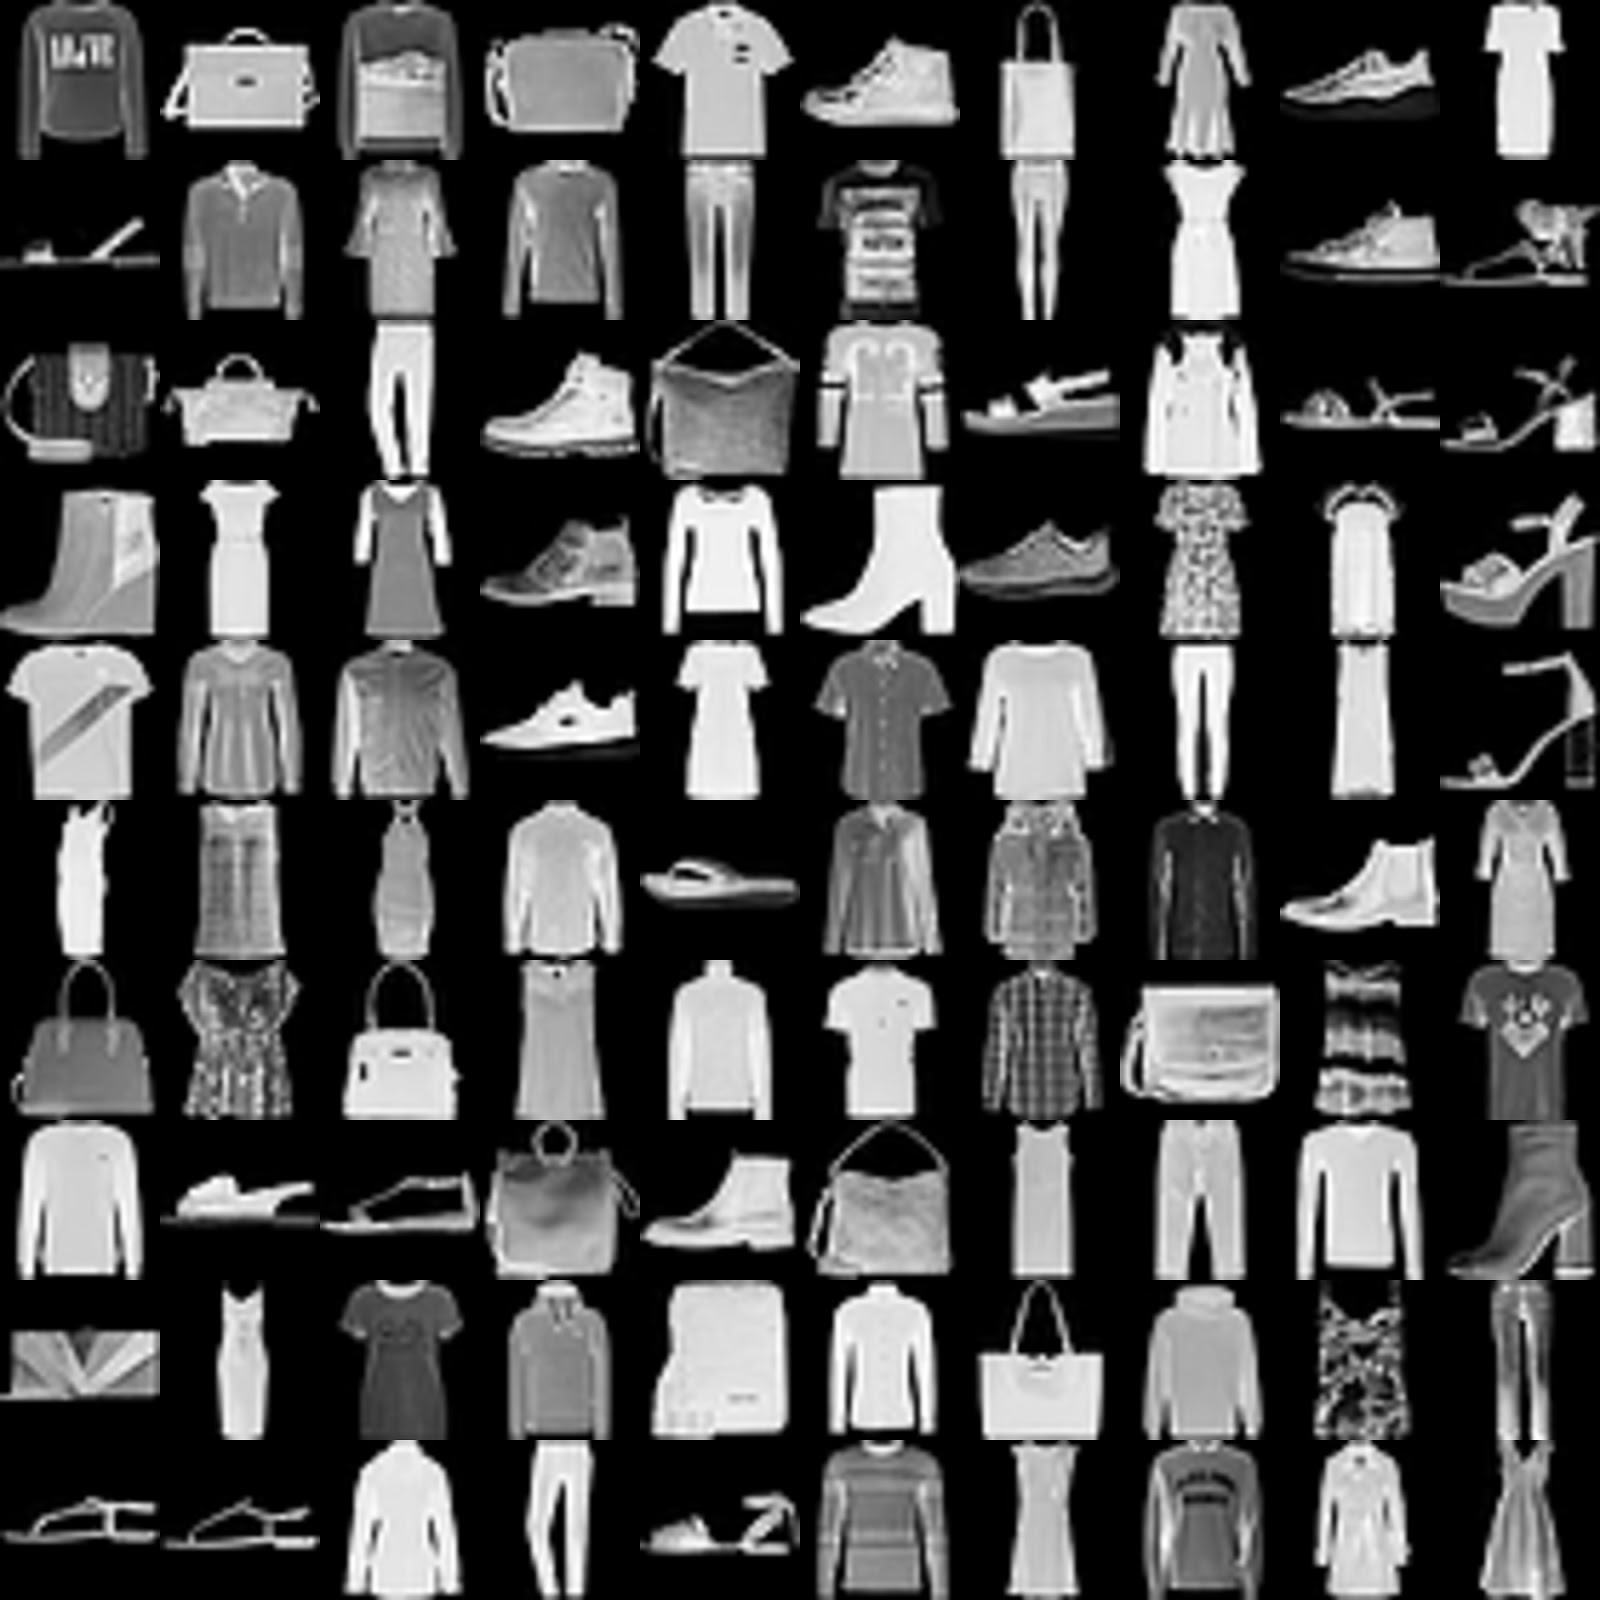


# STEP #2: IMPORTING DATA

In [2]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [3]:
# dataframes creation for both training and testing datasets 
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep = ',')

# STEP #3: VISUALIZATION OF THE DATASET  

In [4]:
# Let's view the head of the training dataset
# 784 indicates 28x28 pixels and 1 coloumn for the label
# After you check the tail, 60,000 training dataset are present
fashion_train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
# Let's view the last elements in the training dataset
fashion_train_df.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[5 rows x 785 columns]

In [6]:
# Let's view the head of the testing dataset
fashion_test_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   
2      99  ...         0         0         0         0        63        53   
3       0  ...       137       126       140         0       133       224   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2        31         0         0         0  
3       222        56         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [7]:
# Let's view the last elements in the testing dataset
fashion_test_df.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
9995       0  ...        32        23        14        20         0         0   
9996       0  ...         0         0         0         2        52        23   
9997       0  ...       175       172       172       182       199       222   
9998       0  ...         0         0         0         0         0         1   
9999     119  ...       111        95        75        44         1         0   

      pixel781  pixel782  pixel783  pixel784  
9995         1         0         0         0  
9996        28         0         0         0  
9997        42         0         1         0  
9998         0         0         0         0  
9999         0         0         0         0  

[5 rows x 785 columns]

In [8]:
fashion_train_df.shape

(60000, 785)

In [10]:
# Create training and testing arrays
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [11]:
training.shape

(60000, 785)

In [12]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

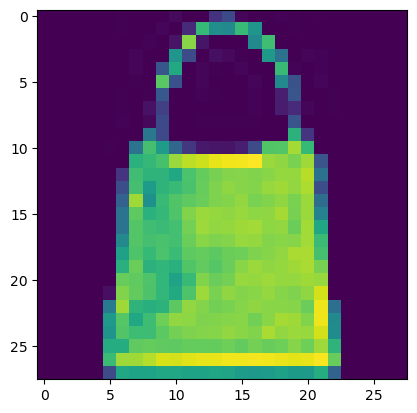

In [26]:
# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow( training[i,1:].reshape((28,28)) ) # reshape and plot the image

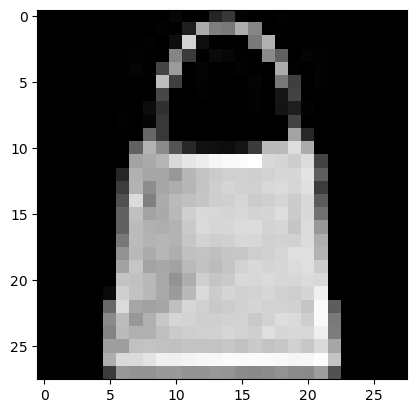

In [27]:
plt.imshow( training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

In [28]:
label = training[i,0]
label

8.0

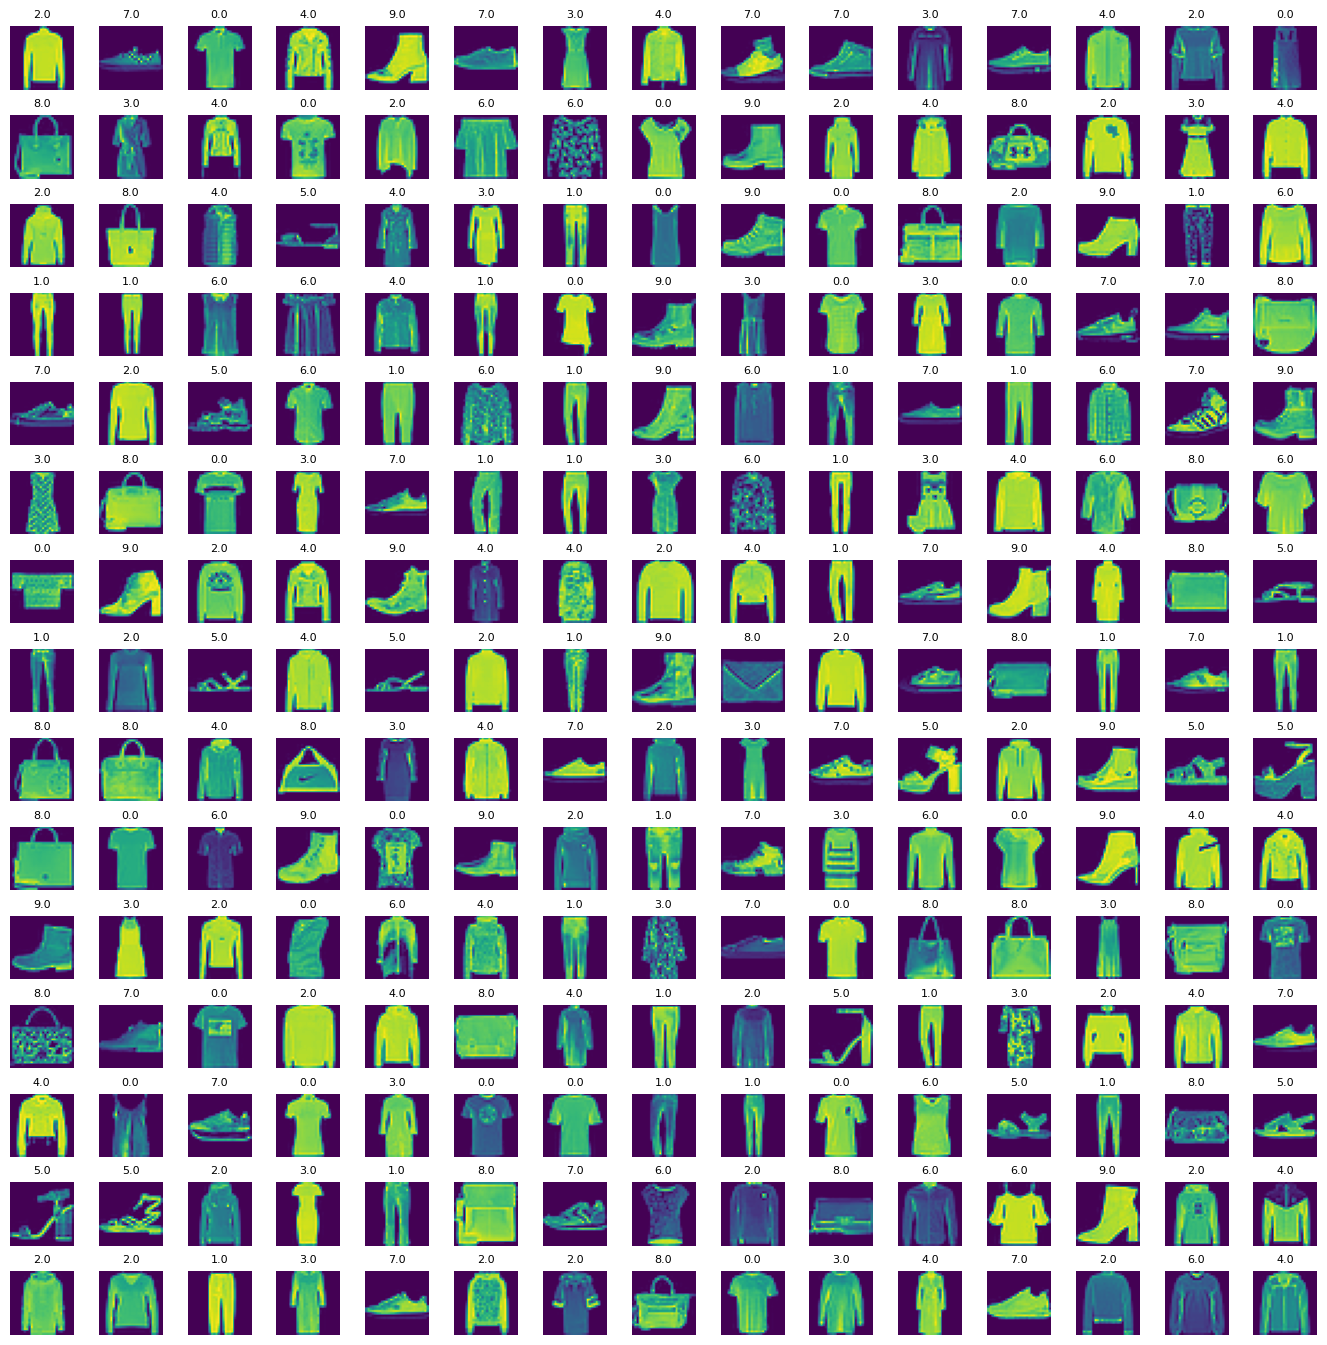

In [29]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4) # to be able to view the data 

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot
        

# STEP #4: TRAINING THE MODEL

In [30]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [31]:
from sklearn.model_selection import train_test_split
# validation dataset that might used to help the model to generalize
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [32]:
X_train.shape

(48000, 784)

In [33]:
y_train.shape

(48000,)

In [37]:
# * unpack the tuple. Reshape the data in a form that CNN can accept 
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [38]:
X_train.shape

(48000, 28, 28, 1)

In [39]:
X_test.shape

(10000, 28, 28, 1)

In [40]:
X_validate.shape

(12000, 28, 28, 1)

In [45]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)


In [48]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.losses import SparseCategoricalCrossentropy

In [49]:
# build your CNN model using keras 

# 1. Initialize your model 

# 2. Start with Convolutional layer ** try to use the hint that we discussed in the lecture of the lab in 
#    order to enhance the model 

# Apply the non linearity 

# 3. pooling 

# 4. flattening 

# 5. Dense layer (think about number layers & what are the activation fucntions)

#5. Complie the model by defineing the cost function and the optimizer for the model as well the used metrics to measure the qulaity of the model 

# 6. Define the training parameters 
    # number of epochs 
    # batch size 
    # training and validation set 

model = keras.Sequential(
    [
        Conv2D(16, (3, 3), input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dense(10, activation='softmax')
    ]
)

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                27050     
                                                                 
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_validate, y_validate))

Epoch 1/10
375/375 [==============================] - 39s 102ms/step - loss: 0.6164 - accuracy: 0.7870 - val_loss: 0.4484 - val_accuracy: 0.8438
Epoch 2/10
375/375 [==============================] - 36s 96ms/step - loss: 0.4261 - accuracy: 0.8525 - val_loss: 0.4244 - val_accuracy: 0.8529
Epoch 3/10
375/375 [==============================] - 37s 98ms/step - loss: 0.3913 - accuracy: 0.8640 - val_loss: 0.3754 - val_accuracy: 0.8699
Epoch 4/10
375/375 [==============================] - 35s 94ms/step - loss: 0.3680 - accuracy: 0.8724 - val_loss: 0.3602 - val_accuracy: 0.8755
Epoch 5/10
375/375 [==============================] - 37s 98ms/step - loss: 0.3542 - accuracy: 0.8765 - val_loss: 0.3543 - val_accuracy: 0.8797
Epoch 6/10
375/375 [==============================] - 35s 92ms/step - loss: 0.3405 - accuracy: 0.8813 - val_loss: 0.3435 - val_accuracy: 0.8823
Epoch 7/10
375/375 [==============================] - 35s 92ms/step - loss: 0.3304 - accuracy: 0.8850 - val_loss: 0.3406 - val_accuracy

In [53]:
# use sparse_categorical_crossentropy for the loss function and accuracy for the metrics of accuracy 
history.history

{'loss': [0.6164305210113525,
  0.4260616898536682,
  0.3913392424583435,
  0.3679894506931305,
  0.3541933596134186,
  0.3405175507068634,
  0.3304275572299957,
  0.3203854262828827,
  0.31319570541381836,
  0.30420082807540894],
 'accuracy': [0.7869791388511658,
  0.8524791598320007,
  0.8640000224113464,
  0.8723958134651184,
  0.8765000104904175,
  0.8813124895095825,
  0.8849999904632568,
  0.8883958458900452,
  0.890958309173584,
  0.8936041593551636],
 'val_loss': [0.44839954376220703,
  0.42438119649887085,
  0.375404953956604,
  0.36018991470336914,
  0.3542618751525879,
  0.3434654474258423,
  0.34058642387390137,
  0.337168425321579,
  0.3361603617668152,
  0.3200088441371918],
 'val_accuracy': [0.84375,
  0.8529166579246521,
  0.8699166774749756,
  0.8755000233650208,
  0.8796666860580444,
  0.8822500109672546,
  0.8816666603088379,
  0.8857499957084656,
  0.8834166526794434,
  0.8879166841506958]}

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 16s 338us/step - loss: 0.4060 - accuracy: 0.8586 - val_loss: 0.3801 - val_accuracy: 0.8726
Epoch 2/5
48000/48000 [==============================] - 17s 347us/step - loss: 0.3769 - accuracy: 0.8690 - val_loss: 0.3593 - val_accuracy: 0.8804
Epoch 3/5
48000/48000 [==============================] - 20s 416us/step - loss: 0.3579 - accuracy: 0.8751 - val_loss: 0.3455 - val_accuracy: 0.8842
Epoch 4/5
48000/48000 [==============================] - 17s 350us/step - loss: 0.3412 - accuracy: 0.8801 - val_loss: 0.3294 - val_accuracy: 0.8881
Epoch 5/5
48000/48000 [==============================] - 18s 368us/step - loss: 0.3247 - accuracy: 0.8878 - val_loss: 0.3210 - val_accuracy: 0.8886


# STEP #5: EVALUATING THE MODEL

In [54]:
# 1. evaluate your model using test_set 

# 2. compare the validation accuracy of the last epoch and test accuracy and explain in your words why they are differnt. 
# - Validation accuracy of the last epoch was 88.78%, while the test accuracy was 88.76%, just the same.

# Q. Discuss how to enhance the performance of the model and explain in your words why that help and how much ?!
# - The performance of the model can be enhanced with more validation data provided to it. An increase in training data by an 
# excessive amount can cause the model to overfit to new, unknown data. Additionally, increasing the number of epochs can also help.

# hint: update the architecture by adding dropout regularization 

# 3. hint: use the confusion matrix for that 
test_results = model.evaluate(X_test, y_test, batch_size=1)

10000/10000 [==============================] - 37s 4ms/step - loss: 0.3235 - accuracy: 0.8876


In [59]:
print("Accuracy of test dataset: ", test_results[1])

Accuracy of test dataset:  0.8876000046730042


In [61]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 8s 25ms/step


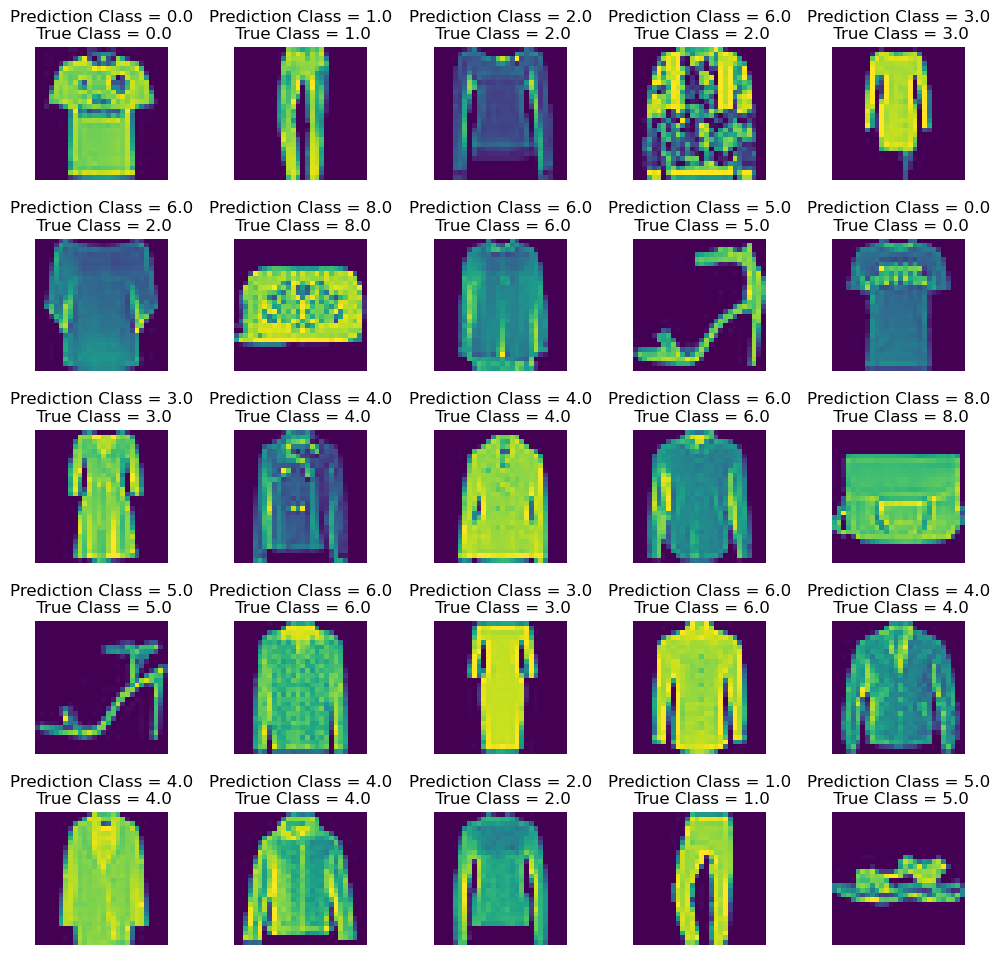

In [62]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


8876


<AxesSubplot:>

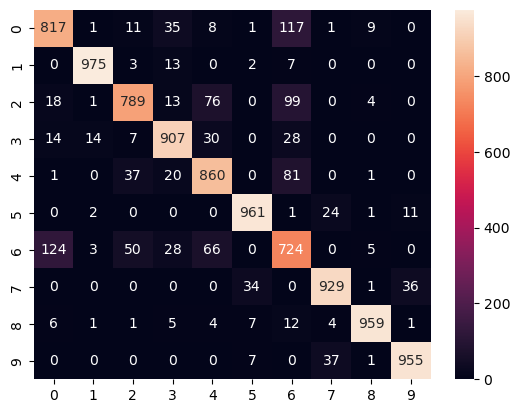

In [69]:
from sklearn.metrics import confusion_matrix

# use seaborn library to plot the confusion matrix 
mtrx = confusion_matrix(y_test, predicted_classes)

# Sum the diagonal element to get the total true correct values
sum = np.trace(mtrx)
print(sum)
sns.heatmap(mtrx, annot=True, fmt=".0f")

In [70]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.82      0.83      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.88      0.79      0.83      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.82      0.86      0.84      1000
     Class 5       0.95      0.96      0.96      1000
     Class 6       0.68      0.72      0.70      1000
     Class 7       0.93      0.93      0.93      1000
     Class 8       0.98      0.96      0.97      1000
     Class 9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

